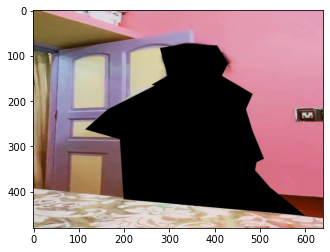

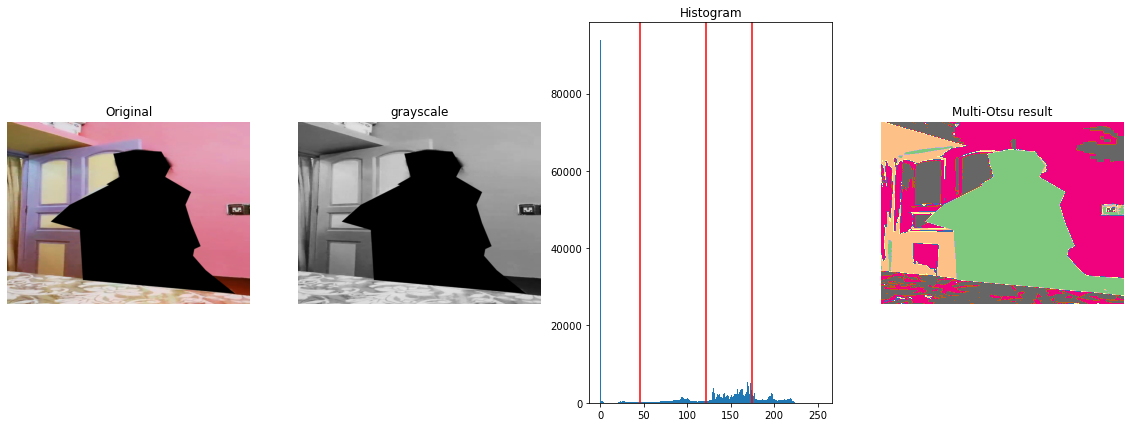

In [5]:

"""
Multi-Otsu calculates several thresholds, determined by the number of desired classes.
Liao, P-S., Chen, T-S. and Chung, P-C., 
“A fast algorithm for multilevel thresholding”, 
Journal of Information Science and Engineering 17 (5): 713-727, 2001
"""

import cv2   
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray,rgb2hsv
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu

img = 'images/image_2.png'
# Read an image
image_original = io.imread(img)
# image = rgb2gray(image_original)
# image = rgb2hsv(image_original)
# image = cv2.cvtColor(image_original, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
plt.imshow(image_original)

# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(image, classes=4)

# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(image, bins=thresholds)
output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8


#Let us look at the input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,7))

# Plotting the original image.
ax[0].imshow(image_original)
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the original image.
ax[1].imshow(image, cmap='gray')
ax[1].set_title('grayscale')
ax[1].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[2].hist(image.ravel(), bins=255)
ax[2].set_title('Histogram')
for thresh in thresholds:
    ax[2].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[3].imshow(regions, cmap='Accent')
ax[3].set_title('Multi-Otsu result')
ax[3].axis('off')
    
plt.subplots_adjust()

plt.show()

fig.savefig(f'tests_otsu/{img}')